# Fucntion transformers

In [5]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df=pd.read_csv(r"C:\Users\devan\OneDrive\Desktop\ML Datasets and Notes\train.csv",usecols=['Age','Fare','Survived'])

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
X=df.drop('Survived',axis=1)

In [10]:
y=df['Survived']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Text(0.5, 1.0, 'Age QQ Plot')

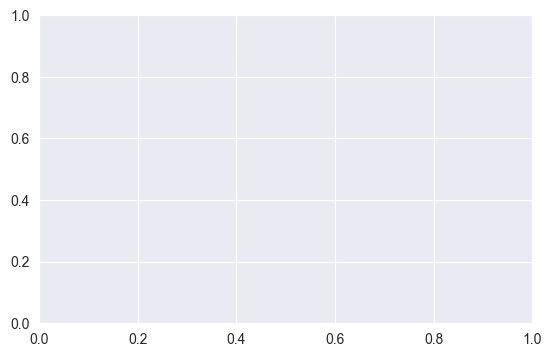

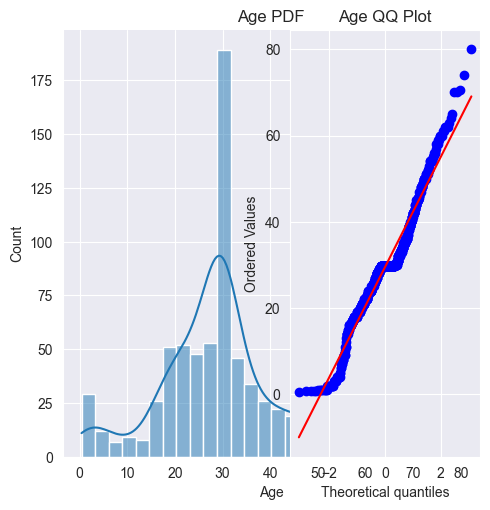

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(X_train['Age'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

Text(0.5, 1.0, 'Fare QQ Plot')

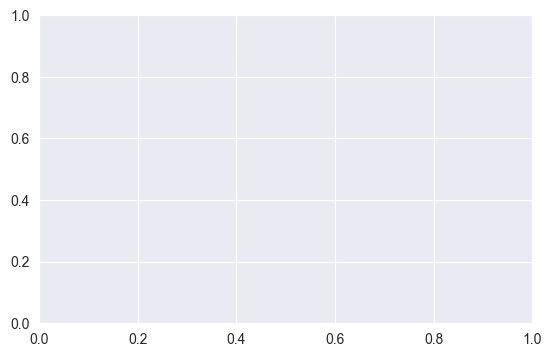

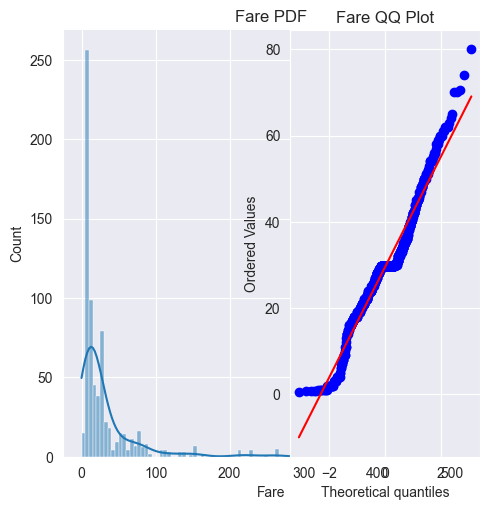

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(X_train['Fare'],kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

In [15]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()


In [16]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [17]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
Y_pred=clf2.predict(X_test)

In [19]:
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred))
print("Accuracy of Decision Tree",accuracy_score(y_test,Y_pred))

Accuracy of Logistic Regression 0.6480446927374302
Accuracy of Decision Tree 0.6536312849162011


In [22]:
# applying log trNFORMATIONS
#  np.log fails when it comes to zero values
# whereas np.log1p adds 1 to the value so that it becomes non-zero
log_transformer=FunctionTransformer(func=np.log1p)

In [23]:
X_train_log=log_transformer.fit_transform(X_train)

In [24]:
X_test_log=log_transformer.transform(X_test)

In [25]:
y_pred_log=clf.predict(X_test_log)

In [26]:
Y_pred_log=clf2.predict(X_test_log)

In [27]:
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred_log))
print("Accuracy of Decision Tree",accuracy_score(y_test,Y_pred_log))

Accuracy of Logistic Regression 0.5865921787709497
Accuracy of Decision Tree 0.4134078212290503


In [28]:
X_transformed=log_transformer.transform(X)

In [29]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.655505617977528


In [30]:
trf2=ColumnTransformer([('log',FunctionTransformer(func=np.log1p),["Fare"])],remainder='passthrough')

In [31]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [32]:

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6871508379888268


In [33]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577403245942571
